In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
import pickle

from diffms import ROOT


mol_path = ROOT / "examples" / "test"

with (open(mol_path / "true.pkl", "rb")) as openfile:
    true_mols = pickle.load(openfile)

with open(mol_path / "pred.pkl", "rb") as openfile:
    predicted_mols = pickle.load(openfile)

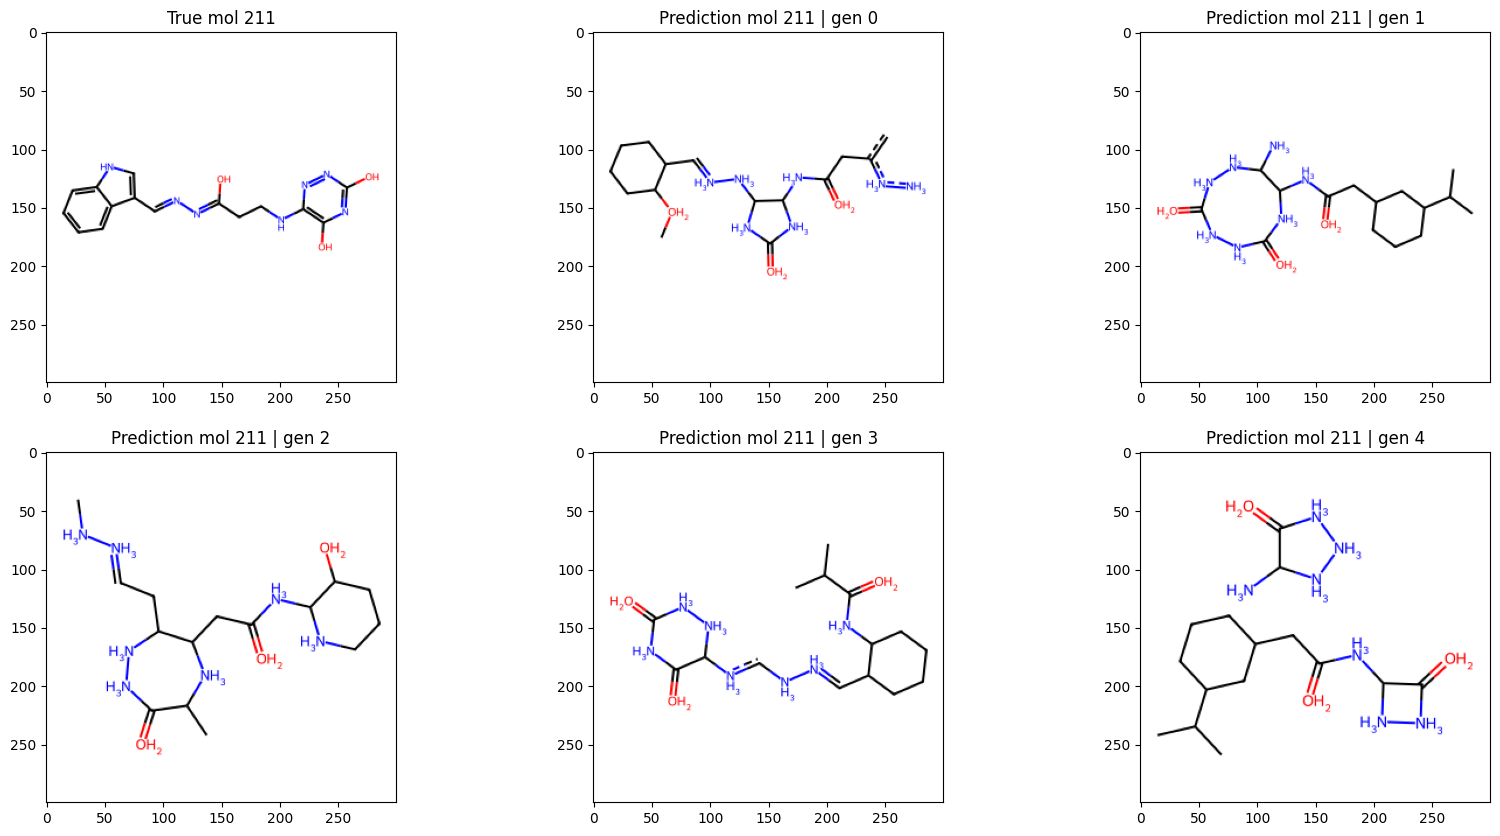

In [17]:
import random

import matplotlib.pyplot as plt
from rdkit.Chem import Draw

idx = random.choice(range(len(true_mols)))

tm = true_mols[idx]
preds = predicted_mols[idx]

tm_img = Draw.MolToImage(tm)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0][0].imshow(tm_img)
ax[0][0].set_title(f"True mol {idx}")


for i, pm in enumerate(preds):
    pm_img = Draw.MolToImage(pm)

    ax[(i+1)//3][(i+1)%3].imshow(pm_img)
    ax[(i+1)//3][(i+1)%3].set_title(f"Prediction mol {idx} | gen {i}")

plt.show()